# Testing techniques before implmeneting them on my actual data.

### Load test image
### Desingate 3 copies in different colorspaces

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

images = np.load('small_rld.npy')

img = images[0]

rgb_img = img

bgr_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

fig, ax = plt.subplots(3,1, figsize=(10,10))
ax[0].imshow(rgb_img,)
ax[0].set_title('RGB')
ax[1].imshow(bgr_img)
ax[1].set_title('BGR')
ax[2].imshow(gray_img, cmap='gray')
ax[2].set_title('Grayscale')
plt.show(fig)

<Figure size 1000x1000 with 3 Axes>

### Create Histograms for Images
(using cv2.calcHist() )

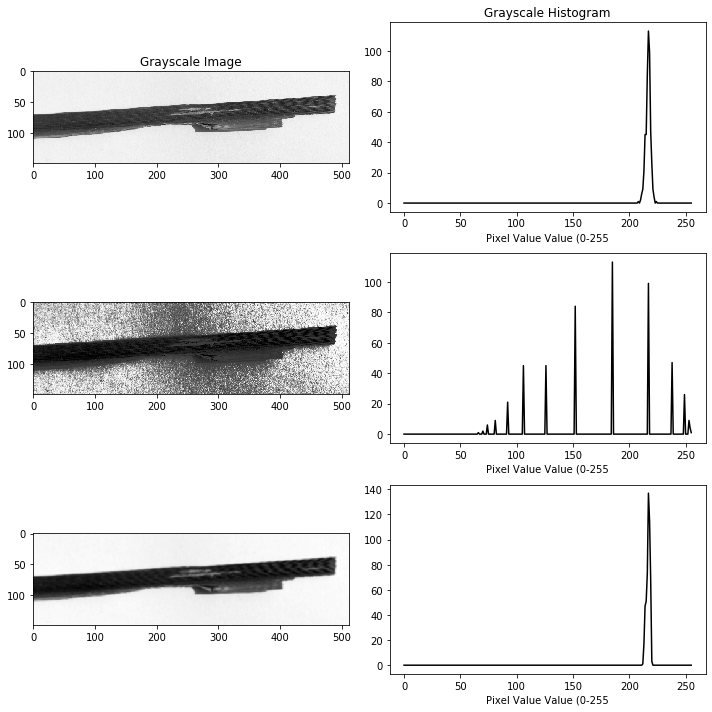

In [2]:
def GBlur(image):
    p_img = cv2.GaussianBlur(image, (9,9), 1)
    return p_img

equalized_img = cv2.equalizeHist(gray_img)

channels = [0]

#Number of bands in the histogram
gray_bins = [256]

#Range of the possible values for values
ranges = [0, 256]
#Histogram of original grayscale image
grayscale_hist = cv2.calcHist(gray_img, channels, None, gray_bins, ranges)

#Histogram of image after histogram equalization has been applied
equalized_hist = cv2.calcHist(equalized_img, channels, None, gray_bins, ranges)

#Img and histogram after gaussian blur
gblur_img = GBlur(gray_img)

gblur_hist = cv2.calcHist(gblur_img, channels, None, gray_bins, ranges)

fig2, ax2 = plt.subplots(3,2, figsize=(10,10))

ax2[0][0].imshow(gray_img, cmap='gray')
ax2[0][0].set_title('Grayscale Image')

ax2[0][1].plot(grayscale_hist, c='black')
ax2[0][1].set_title('Grayscale Histogram')
ax2[0][1].set_xlabel('Pixel Value Value (0-255')

ax2[1][0].imshow(equalized_img, cmap='gray')
ax2[1][1].plot(equalized_hist, c='black')
ax2[1][1].set_xlabel('Pixel Value Value (0-255')

ax2[2][0].imshow(gblur_img, cmap='gray')
ax2[2][1].plot(gblur_hist, c='black')
ax2[2][1].set_xlabel('Pixel Value Value (0-255')

plt.tight_layout()
plt.show(fig2)

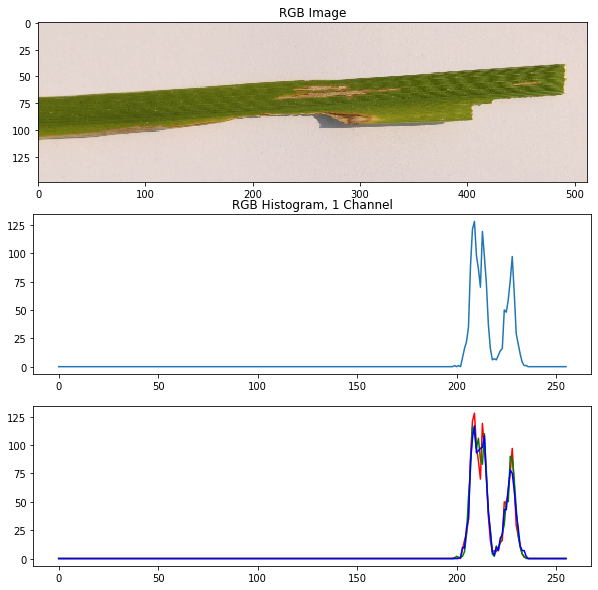

In [3]:
channels = [0]

#Set number of bins
rbg_bins = [256]

#Set range
ranges = [0, 256]

#1 Chennal RGB Histogram
rgb_hist_1 = cv2.calcHist(rgb_img, channels, None, rbg_bins, ranges)

fig3, ax3 = plt.subplots(3,1, figsize=(10,10))
ax3[0].imshow(rgb_img)
ax3[0].set_title('RGB Image')
ax3[1].plot(rgb_hist_1)
ax3[1].set_title('RGB Histogram, 1 Channel')

#Plotting R, G, and B seperately

colors = ['r', 'g', 'b']

for i in range(len(colors)):
    singlechannel = cv2.calcHist(rgb_img, [i], None, rbg_bins, ranges)
    ax3[2].plot(singlechannel, c=colors[i])
    #ax3[2].set_xlim((37.5, 50))



### Image Segmentation
Finding Canny Edges

(149, 512)


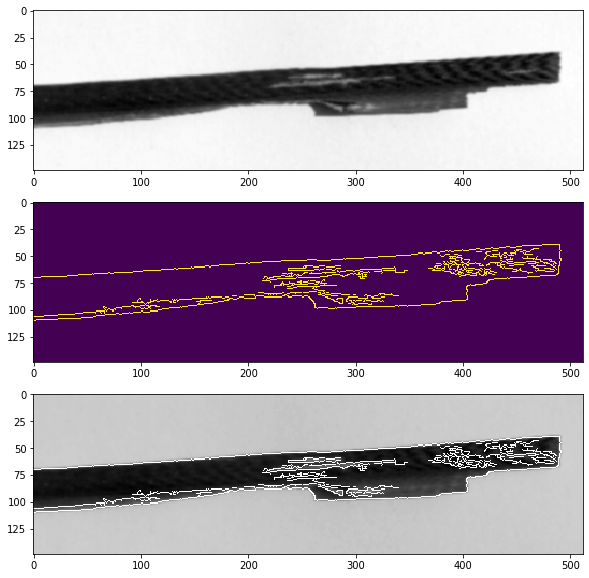

In [16]:

canny_edges = cv2.Canny(gray_img, 30, 200)
print(canny_edges.shape)

contours, hierarchy = cv2.findContours(canny_edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

contoured = gblur_img.copy()

ldx = -1
color = (255,255,255)
thickness = 2
contoured = cv2.drawContours(contoured, contours, ldx, color)




fig4, ax4 = plt.subplots(3,1, figsize=(10,10))
ax4[0].imshow(gblur_img, cmap='gray')
ax4[1].imshow(canny_edges)
ax4[2].imshow(contoured, cmap='gray')

plt.show()